In [8]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler

In [50]:
df = pd.read_csv('AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [51]:
# Select only the passengers column
data = df['#Passengers']
data = np.array(data).reshape(-1,1)
data

array([[112],
       [118],
       [132],
       [129],
       [121],
       [135],
       [148],
       [148],
       [136],
       [119],
       [104],
       [118],
       [115],
       [126],
       [141],
       [135],
       [125],
       [149],
       [170],
       [170],
       [158],
       [133],
       [114],
       [140],
       [145],
       [150],
       [178],
       [163],
       [172],
       [178],
       [199],
       [199],
       [184],
       [162],
       [146],
       [166],
       [171],
       [180],
       [193],
       [181],
       [183],
       [218],
       [230],
       [242],
       [209],
       [191],
       [172],
       [194],
       [196],
       [196],
       [236],
       [235],
       [229],
       [243],
       [264],
       [272],
       [237],
       [211],
       [180],
       [201],
       [204],
       [188],
       [235],
       [227],
       [234],
       [264],
       [302],
       [293],
       [259],
       [229],
       [203],
      

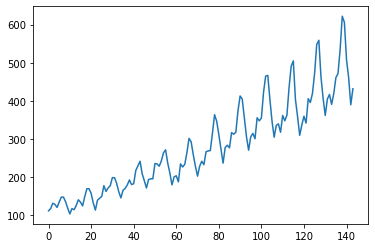

In [52]:
# Plot the passengers
plt.plot(data)

## Normalize the data

In [53]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data)
data.max(), data.min()

(1.0, 0.0)

In [54]:
# Divide the data into train and testing sets
train_size = 100
test_size = 44

train = data[0:train_size, :]
train.shape

(100, 1)

In [55]:
test = data[train_size:144, :]
test.shape

(44, 1)

## Build Training and Testing Dataset

In [56]:
def get_data(data, look_back):
    dataX, dataY = [], []
    for i in range(len(data)-look_back-1):
        a = data[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(data[i+look_back, 0])
    return np.array(dataX), np.array(dataY)

In [57]:
look_back = 1
x_train, y_train = get_data(train, look_back)
x_test, y_test = get_data(test, look_back)

# Verify the shape of the arrays
x_train.shape, x_test.shape

((98, 1), (42, 1))

In [58]:
# Reshape the data to pass them into the Neural Network
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

## Build the Recurrent Neural Network

In [59]:
model = Sequential()
model.add(LSTM(5, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [60]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 5)                 140       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


In [61]:
model.fit(x_train, y_train, epochs=50, batch_size=1)

Train on 98 samples
Epoch 1/50
98/98 [==============================] - 3s 26ms/sample - loss: 0.0344
Epoch 2/50
98/98 [==============================] - 0s 4ms/sample - loss: 0.0154
Epoch 3/50
98/98 [==============================] - 0s 3ms/sample - loss: 0.0126
Epoch 4/50
98/98 [==============================] - 0s 4ms/sample - loss: 0.0115
Epoch 5/50
98/98 [==============================] - 0s 3ms/sample - loss: 0.0103
Epoch 6/50
98/98 [==============================] - 0s 3ms/sample - loss: 0.0090
Epoch 7/50
98/98 [==============================] - 1s 5ms/sample - loss: 0.0080
Epoch 8/50
98/98 [==============================] - 0s 5ms/sample - loss: 0.0069
Epoch 9/50
98/98 [==============================] - 1s 6ms/sample - loss: 0.0058
Epoch 10/50
98/98 [==============================] - 0s 4ms/sample - loss: 0.0050
Epoch 11/50
98/98 [==============================] - 1s 6ms/sample - loss: 0.0042
Epoch 12/50
98/98 [==============================] - 1s 7ms/sample - loss: 0.0037
Epoc

## Make Predictions

In [62]:
y_pred = model.predict(x_test)

In [63]:
scaler.scale_

array([0.0019305])

In [64]:
# Transform into the original scale
y_pred = scaler.inverse_transform(y_pred)
y_test = np.array(y_test)
y_test = y_test.reshape(-1,1)
y_test = scaler.inverse_transform(y_test)

## Plot the Real Data and the Predicted Data

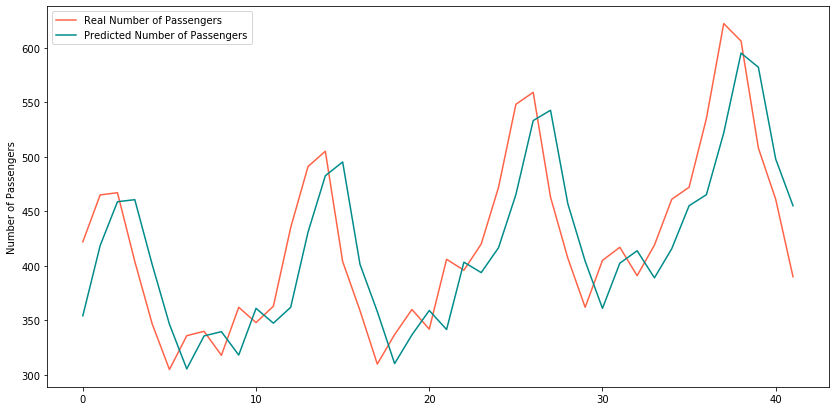

In [65]:
plt.figure(figsize=(14,7))
plt.plot(y_test, label='Real Number of Passengers', color='tomato')
plt.plot(y_pred, label='Predicted Number of Passengers', color='darkcyan')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()